Étape 1 : Données nettoyées
   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0   

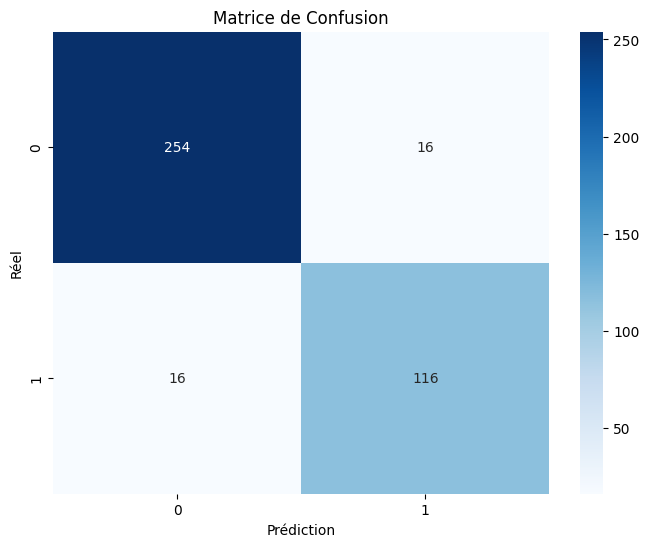

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le jeu de données
file_path = 'pet_adoption_data.csv'  # Mettez à jour le chemin si nécessaire
data = pd.read_csv(file_path)

# Étape 1 : Nettoyer les données (pour simplifier, nous supprimons les lignes avec des valeurs manquantes)
data_cleaned = data.dropna()
print("Étape 1 : Données nettoyées")
print(data_cleaned.head())

# Étape 2 : Sélectionner les caractéristiques (features) et la variable cible
# Utilisation de 'AdoptionLikelihood' comme variable cible
X = data_cleaned.drop(columns=['AdoptionLikelihood'])
y = data_cleaned['AdoptionLikelihood']
print("\nÉtape 2 : Caractéristiques sélectionnées")
print("X (caractéristiques) :")
print(X.head())
print("y (variable cible) :")
print(y.head())

# Encodage des variables catégorielles en valeurs numériques
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
print("\nEncodage des variables catégorielles terminé.")

# Étape 3 : Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nÉtape 3 : Données divisées")
print("Ensemble d'entraînement :")
print(X_train.shape)
print("Ensemble de test :")
print(X_test.shape)

# Étape 4 : Entraîner le modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nÉtape 4 : Modèle entraîné")

# Étape 5 : Prédire sur l'ensemble de test
y_pred = model.predict(X_test)
print("\nÉtape 5 : Prédictions effectuées")
print(y_pred[:10])  # Affiche les 10 premières prédictions

# Étape 6 : Évaluer le modèle avec la matrice de confusion et le rapport de classification
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\nÉtape 6 : Évaluation du modèle")
print("Matrice de confusion :")
print(conf_matrix)
print("\nRapport de classification :")
print(report)

# Étape 7 : Analyser l'importance des caractéristiques
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Caractéristique': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print("\nÉtape 7 : Importance des caractéristiques")
print(feature_importances_df)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.show()
